# Chronic Kidney Disease

In [1]:
import pandas as pd
import ehrapy as ep
import seaborn as sns
import matplotlib.pyplot as plt

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc https://raw.githubusercontent.com/odsti/datasets/master/ckd/processed/ckd_full.csv

--2022-02-09 14:09:13--  https://raw.githubusercontent.com/odsti/datasets/master/ckd/processed/ckd_full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48524 (47K) [text/plain]
Saving to: ‘ckd_full.csv’

ckd_full.csv        100%[===================>]  47,39K  --.-KB/s    in 0,009s  

2022-02-09 14:09:14 (5,24 MB/s) - ‘ckd_full.csv’ saved [48524/48524]



# Data Wrangling

In [4]:
data = pd.read_csv("ckd_full.csv")

Since the dataset does not have a patient ID we add one.

In [5]:
data["Patient_id"] = range(1, len(data) + 1)

We replace nomial feartures with integers.

In [6]:
data["Red Blood Cells"].replace(("normal", "abnormal"), (0, 1), inplace=True)
data["Pus Cell"].replace(("normal", "abnormal"), (0, 1), inplace=True)
data["Pus Cell clumps"].replace(("notpresent", "present"), (0, 1), inplace=True)
data["Bacteria"].replace(("notpresent", "present"), (0, 1), inplace=True)
data["Hypertension"].replace(("no", "yes"), (0, 1), inplace=True)
data["Diabetes Mellitus"].replace(("no", "yes"), (0, 1), inplace=True)
data["Coronary Artery Disease"].replace(("no", "yes"), (0, 1), inplace=True)
data["Appetite"].replace(("good", "poor"), (0, 1), inplace=True)
data["Pedal Edema"].replace(("no", "yes"), (0, 1), inplace=True)
data["Anemia"].replace(("no", "yes"), (0, 1), inplace=True)
data["Class"].replace(("notckd", "ckd"), (0, 1), inplace=True)

In [7]:
data.set_index("Patient_id", inplace=True)

In [8]:
data.to_csv("chronic_kidney_disease_prepared.csv")

## ehrapy sanity check

In [9]:
adata = ep.io.read("chronic_kidney_disease_prepared.csv",
                   extension="csv",
                   index_column="Patient_id")

In [10]:
adata.var_names

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [11]:
ep.pp.type_overview(adata)

Variable names for AnnData object with 25 vars and 400 obs                                   
╚══ 🔓 Unencoded variables                                                                   
    ╠══ Age -> data type: floating                                                           
    ╠══ Blood Pressure -> data type: floating                                                
    ╠══ Specific Gravity -> data type: floating                                              
    ╠══ Albumin -> data type: floating                                                       
    ╠══ Sugar -> data type: floating                                                         
    ╠══ Red Blood Cells -> data type: floating                                               
    ╠══ Pus Cell -> data type: floating                                                      
    ╠══ Pus Cell clumps -> data type: floating                                               
    ╠══ Bacteria -> data type: floating                                                      
    ╠══ Blood Glucose Random -> data type: floating                                          
    ╠══ Blood Urea -> data type: floating                                                    
    ╠══ Serum Creatinine -> data type: floating                                              
    ╠══ Sodium -> data type: floating                                                        
    ╠══ Potassium -> data type: floating                                                     
    ╠══ Hemoglobin -> data type: floating                                                    
    ╠══ Packed Cell Volume -> data type: floating                                            
    ╠══ White Blood Cell Count -> data type: floating                                        
    ╠══ Red Blood Cell Count -> data type: floating                                          
    ╠══ Hypertension -> data type: floating                                                  
    ╠══ Diabetes Mellitus -> data type: floating                                             
    ╠══ Coronary Artery Disease -> data type: floating                                       
    ╠══ Appetite -> data type: floating                                                      
    ╠══ Pedal Edema -> data type: floating                                                   
    ╠══ Anemia -> data type: floating                                                        
    ╚══ Class -> data type: floating                                                         

In [12]:
_ = ep.pp.calculate_qc_metrics(adata)

In [13]:
adata.obs

,missing_values_abs,missing_values_pct
Patient_id,,
1,3,12.0
2,5,20.0
3,3,12.0
4,0,0.0
5,2,8.0
...,...,...
396,0,0.0
397,0,0.0
398,0,0.0


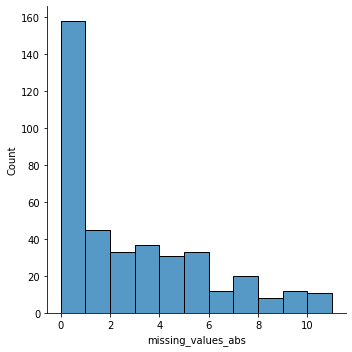

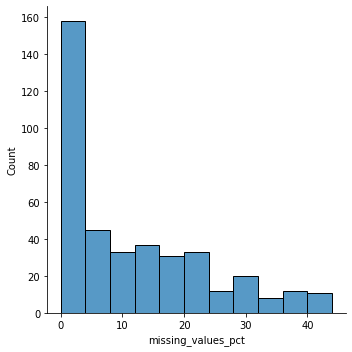

In [14]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])

In [15]:
adata.var

,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max
Age,9,2.25,NaN,NaN,NaN,NaN,NaN
Blood Pressure,12,3.00,NaN,NaN,NaN,NaN,NaN
Specific Gravity,47,11.75,NaN,NaN,NaN,NaN,NaN
Albumin,46,11.50,NaN,NaN,NaN,NaN,NaN
Sugar,49,12.25,NaN,NaN,NaN,NaN,NaN
Red Blood Cells,152,38.00,NaN,NaN,NaN,NaN,NaN
Pus Cell,65,16.25,NaN,NaN,NaN,NaN,NaN
Pus Cell clumps,4,1.00,NaN,NaN,NaN,NaN,NaN
Bacteria,4,1.00,NaN,NaN,NaN,NaN,NaN
Blood Glucose Random,44,11.00,NaN,NaN,NaN,NaN,NaN


Feature Red Blood Cell Count had more than 32.75% missing values!

Feature Red Blood Cells had more than 38.0% missing values!

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for 
faster imputations.

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/rich/live.py:221: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/rich/live.py:221: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/rich/live.py:221: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/xinyuezhang/opt/anaconda3/envs/ehrapy/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


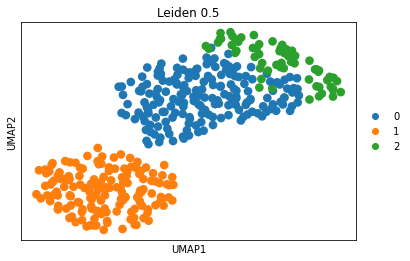

In [16]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

In [17]:
adata.var_names

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

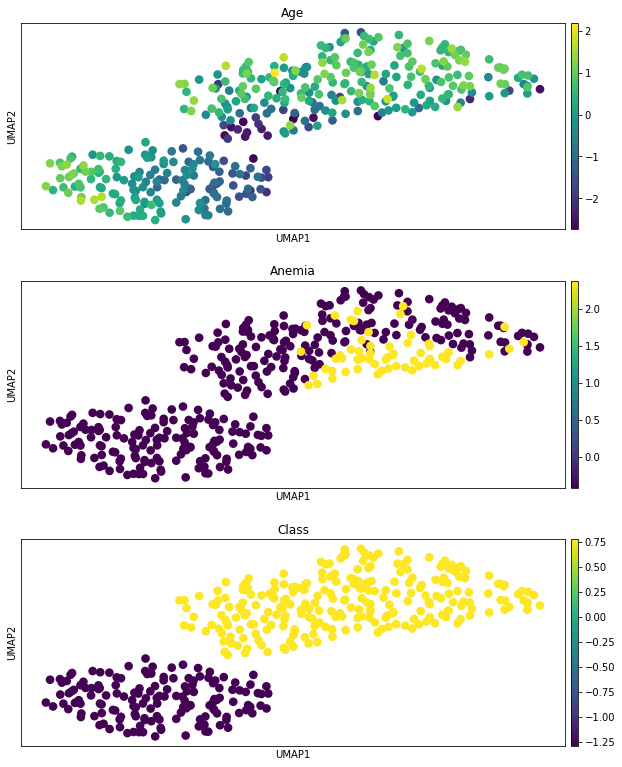

In [18]:
ep.pl.umap(adata, color=["Age", "Anemia", "Class",], ncols=1, wspace=0.75)